<a href="https://colab.research.google.com/github/cristiank1038/Proyecto_ML/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **calidad del agua**



1) Fuente de datos
* https://www.kaggle.com/datasets/adityakadiwal/water-potability

2) Breve descripción de datos
* realizar predicion de la calidad del agua


3) ¿Cuál es el objetivo?
* determinar si el agua es potable o no

4) ¿Este es un problema de clasificación o regresión?
* clasificación

5) ¿Cuántas características hay?
* total 10 columns

6) ¿Cuántas filas de datos hay?
* 3276  entries

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#abusso de niños
import pandas as pd
filename = '/content/drive/MyDrive/Codificación de Dojo-DS/semana 7 Modelos de clasificación/water_potability.csv'
df = pd.read_csv(filename)  #“df” (que significa “dataframe” o marco de datos)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
# eliminado las filas duplicadas
df.duplicated().sum()

0

#**identificado y abordado los valores faltantes**

procedmos a imputar esos valores faltantes con la media de cada una de esas columnas donde faltn datos

In [11]:

df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
# Rellenaremos la columna “ph”  de nuestro conjunto de datos con una mediana de dichos datos:
median_ph = df['ph'].median()
df['ph'].fillna(median_ph, inplace=True)
df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
# Rellenaremos la columna “Sulfate”  de nuestro conjunto de datos con una mediana de dichos datos:
median_Sulfate = df['Sulfate'].median()
df['Sulfate'].fillna(median_Sulfate, inplace=True)
df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
# Rellenaremos la columna “Trihalomethanes”  de nuestro conjunto de datos con una mediana de dichos datos:
median_Trihalomethanes = df['Trihalomethanes'].median()
df['Trihalomethanes'].fillna(median_Trihalomethanes, inplace=True)
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## **producido visuales univariantes para el objetivo y todas las características**

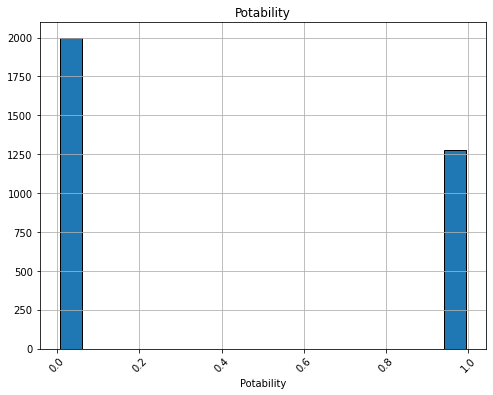

In [18]:
# grafifo de histogram de la columna Age
import matplotlib.pyplot as plt
df['Potability'].hist(bins = 15, figsize = (8,6), edgecolor='black', rwidth = 0.8)
plt.xlabel('Potability')
plt.title('Potability')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain') 
plt.show()

## **producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra**

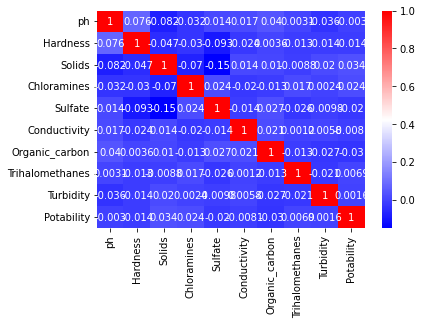

In [17]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'bwr', annot = True)